# Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Loading Model

In [4]:
model= tf.keras.models.load_model('trained_model.keras')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

# Visualizing single image of data 

In [7]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 10.2 MB/s eta 0:00:04
    --------------------------------------- 0.7/38.8 MB 8.3 MB/s eta 0:00:05
    --------------------------------------- 0.9/38.8 MB 8.5 MB/s eta 0:00:05
   - -------------------------------------- 1.2/38.8 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.8 MB 7.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.0/38.8 MB 7.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.8 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.8 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.8 MB 8.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.0/38.8 MB 8.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.8/38.8 MB 9.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.8 MB 9.4 MB/s eta 0:00:04
   --


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\Users\asus\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -------- ------------------------------- 0.4/1.8 MB 11.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 9.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/1.8 MB 9.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.7 MB/s eta 0:00:00


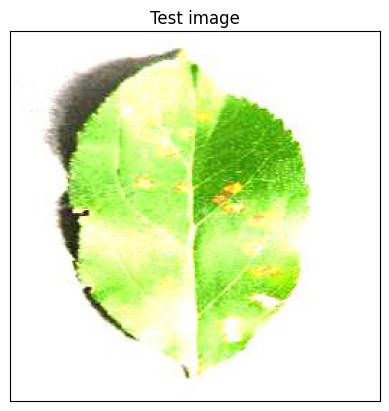

In [12]:
#The cv2 module is the main module in OpenCV that provides developers with an easy-to-use interface for working with image and video processing functions.
import cv2
image_path = "test/test/AppleCedarRust1.JPG"
#reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB

#displaying image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [16]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 91ms/step


(array([[1.50237201e-11, 3.37382314e-12, 9.99999642e-01, 1.92034458e-13,
         1.41780925e-08, 1.04666342e-09, 3.68660967e-13, 9.99372547e-12,
         1.05772291e-14, 4.34538126e-12, 4.02341666e-15, 1.42271837e-11,
         2.22292332e-13, 3.69790570e-13, 1.50325204e-11, 1.17256749e-09,
         5.29482125e-10, 5.03371962e-11, 3.75155773e-09, 1.42843870e-08,
         1.07635352e-12, 1.55595610e-12, 4.84888629e-10, 2.16168014e-10,
         1.22315234e-14, 1.27111711e-12, 2.03906098e-12, 8.52687983e-13,
         2.86130142e-08, 3.83530874e-10, 2.70406616e-07, 1.49854478e-12,
         6.57935484e-09, 5.15090188e-14, 1.06100673e-09, 6.42365094e-08,
         4.12774051e-11, 4.61261118e-09]], dtype=float32),
 (1, 38))

In [17]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [19]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

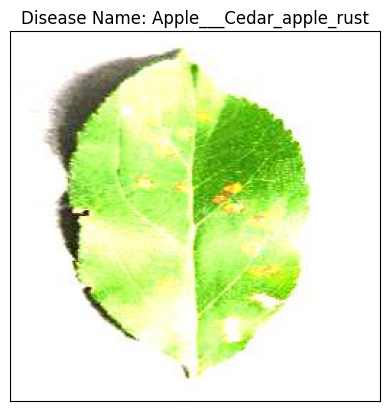

In [20]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()